# Pandas - Problems

Ref: https://www.tiesdekok.com

**Python version:** Python 3.6+     
**Recommended environment: `researchPython`**

In [234]:
import os
recommendedEnvironment = 'researchPython'
if os.environ['CONDA_DEFAULT_ENV'] != recommendedEnvironment:
    print('Warning: it does not appear you are using the {0} environment, did you run "conda activate {0}" before starting Jupyter?'.format(recommendedEnvironment))

# Introduction

### Relevant tutorial notebooks:

1) [`0_python_basics.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/0_python_basics.ipynb)  


2) [`1_opening_files.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/1_opening_files.ipynb)  


3) [`2_handling_data.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/2_handling_data.ipynb)  


4) [`3_visualizing_data.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/3_visualizing_data.ipynb)  

# Part 1  

The tasks below will use two datasets that are retrieved from the "City of Seattle Open Data portal":   


* [SPD Crime Data: 2008-Present](https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5)

* [Use Of Force](https://data.seattle.gov/Public-Safety/Use-Of-Force/ppi5-g2bj)

Both csv files contain crime and police data at the "Beats" geographical level.  
For more information on what a "Beat" is, see this webpage: [Tweets by Beat](https://www.seattle.gov/police/information-and-data/tweets-by-beat)


### Import required packages

In [235]:
%matplotlib inline

In [236]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [237]:
import os
import pandas as pd
import numpy as np

### Load both datasets
There are two `.csv` files located in the "data" folder:
1. `SPD_Crime_Data_2019 [June 2020].csv` --> assign to the variable: `crime_df`
2. `Use_Of_Force [June 2020].csv`--> assign to the variable: `force_df`

In [238]:
crime_df = pd.read_csv(os.path.join('data', 'SPD_Crime_Data_2019 [June 2020].csv'))
force_df = pd.read_csv(os.path.join('data', 'Use_Of_Force [June 2020].csv'))

crime_df = crime_df.drop('Unnamed: 0', axis=1)

In [239]:
crime_df.to_csv(os.path.join('data', 'SPD_Crime_Data_2019 [June 2020].csv'), index=False)

**Tip:** *I recommend to use the `os.path.join()` function to join folders and files together. This ensures that it will work regardless of your operating system.*

### Print the amount of rows for each dataframe

In [240]:
print(len(crime_df.index))
print(len(force_df.index))

70034
11297


### Generate a dataframe that shows the first 3 observations for each dataframe

In [241]:
crime_df.head(3)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-043971,12604927228,2019-02-04 00:00:00,2020-02-04 08:00:00,2020-02-04 21:18:52,A,PROPERTY,FRAUD OFFENSES,Wire Fraud,26E,N,U,U2,UNIVERSITY,45XX BLOCK OF 7TH AVE NE,-122.320720,47.662473
1,2020-042066,12603358305,2019-12-18 12:00:00,NaN,2020-02-03 19:38:23,A,PROPERTY,FRAUD OFFENSES,False Pretenses/Swindle/Confidence Game,26A,N,J,J3,ROOSEVELT/RAVENNA,71XX BLOCK OF WOODLAWN AVE NE,-122.324611,47.680156
2,2020-901669,12602800513,2019-11-15 20:00:00,2019-11-15 22:00:00,2020-02-03 12:12:18,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,W,K,K2,PIONEER SQUARE,8XX BLOCK OF OCCIDENTAL AVE S,-122.333268,47.596783


In [242]:
force_df.head(3)

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,2014UOF-0001-1377-203,251,Level 1 - Use of Force,06/07/2014 12:09:00 AM,East,CHARLIE,C2,1594,203,Black or African American,Male
1,2014UOF-0002-1098-166,218,Level 1 - Use of Force,05/30/2014 02:06:00 PM,East,GEORGE,G1,1673,166,White,Male
2,2014UOF-0003-1031-125,178,Level 1 - Use of Force,05/23/2014 05:24:00 PM,West,KING,K3,1690,125,Asian,Female


### Save the first 100 rows of the `crime_df` dataframe as an Excel file called "crime_df_100.xlsx"
You can just save it to the current working directory

In [243]:
## Answer key note: I use the pipeline folder to keep the Github repository organized.
crime_df.head(100).to_excel(os.path.join('pipeline', 'crime_df_100.xlsx'))

# The below only applies to the `crime_df` dataset. 

### Only show the `Report DateTime` column

In [244]:
crime_df['Report DateTime'].head(2)

0    2020-02-04 21:18:52
1    2020-02-03 19:38:23
Name: Report DateTime, dtype: object

In [245]:
crime_df.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-043971,12604927228,2019-02-04 00:00:00,2020-02-04 08:00:00,2020-02-04 21:18:52,A,PROPERTY,FRAUD OFFENSES,Wire Fraud,26E,N,U,U2,UNIVERSITY,45XX BLOCK OF 7TH AVE NE,-122.320720,47.662473
1,2020-042066,12603358305,2019-12-18 12:00:00,NaN,2020-02-03 19:38:23,A,PROPERTY,FRAUD OFFENSES,False Pretenses/Swindle/Confidence Game,26A,N,J,J3,ROOSEVELT/RAVENNA,71XX BLOCK OF WOODLAWN AVE NE,-122.324611,47.680156
2,2020-901669,12602800513,2019-11-15 20:00:00,2019-11-15 22:00:00,2020-02-03 12:12:18,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,W,K,K2,PIONEER SQUARE,8XX BLOCK OF OCCIDENTAL AVE S,-122.333268,47.596783
3,2020-901632,12602385305,2019-02-07 00:00:00,2020-02-02 12:00:00,2020-02-03 07:42:15,A,PROPERTY,FRAUD OFFENSES,Identity Theft,26F,SW,W,W1,NORTH ADMIRAL,34XX BLOCK OF 36TH AVE SW,-122.377092,47.572153
4,2020-040844,12601680195,2019-12-25 00:00:00,2020-01-20 00:00:00,2020-02-02 15:04:05,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,E,G,G3,JUDKINS PARK/NORTH BEACON HILL,4XX BLOCK OF 23RD AVE S,-122.302231,47.598579


### Generate a dataframe with only the `Report DateTime` and `Crime Against Category` columns 

In [246]:
crime_df[['Report DateTime', 'Crime Against Category']].head(2)

,Report DateTime,Crime Against Category
0,2020-02-04 21:18:52,PROPERTY
1,2020-02-03 19:38:23,PROPERTY


### Count the number of incidents by category using the `Crime Against Category` column

In [247]:
crime_df['Crime Against Category'].value_counts()

PROPERTY       49797
PERSON         11899
SOCIETY         8336
NOT_A_CRIME        2
Name: Crime Against Category, dtype: int64

### Generate a new column called `Person` that contains the value True if the `Crime Against Category` is "PERSON" else False

In [248]:
crime_df['Person'] = crime_df['Crime Against Category'] == 'PERSON'

I recommend to verify that it worked by only showing a dataframe with the new column and the `Crime Against Category` column.   

Use `.sample(10)` to generate a random sample of 10 rows.

In [249]:
crime_df[['Crime Against Category', 'Person']].sample(10)

,Crime Against Category,Person
2845,PROPERTY,False
52577,PROPERTY,False
8905,PROPERTY,False
28870,PROPERTY,False
56460,PROPERTY,False
51516,PERSON,True
3703,PROPERTY,False
7935,PROPERTY,False
16277,PERSON,True
66669,PROPERTY,False


### Count the number of True values in the `Person` column

In [250]:
crime_df['Person'].value_counts()

False    58135
True     11899
Name: Person, dtype: int64

### Generate a dataframe with only "FRAUD OFFENSES" offenses   
Use the `Offense Parent Group` column.

In [251]:
crime_df[crime_df['Offense Parent Group'] == 'FRAUD OFFENSES'].head(5)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,Person
0,2020-043971,12604927228,2019-02-04 00:00:00,2020-02-04 08:00:00,2020-02-04 21:18:52,A,PROPERTY,FRAUD OFFENSES,Wire Fraud,26E,N,U,U2,UNIVERSITY,45XX BLOCK OF 7TH AVE NE,-122.320720,47.662473,False
1,2020-042066,12603358305,2019-12-18 12:00:00,NaN,2020-02-03 19:38:23,A,PROPERTY,FRAUD OFFENSES,False Pretenses/Swindle/Confidence Game,26A,N,J,J3,ROOSEVELT/RAVENNA,71XX BLOCK OF WOODLAWN AVE NE,-122.324611,47.680156,False
3,2020-901632,12602385305,2019-02-07 00:00:00,2020-02-02 12:00:00,2020-02-03 07:42:15,A,PROPERTY,FRAUD OFFENSES,Identity Theft,26F,SW,W,W1,NORTH ADMIRAL,34XX BLOCK OF 36TH AVE SW,-122.377092,47.572153,False
4,2020-040844,12601680195,2019-12-25 00:00:00,2020-01-20 00:00:00,2020-02-02 15:04:05,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,E,G,G3,JUDKINS PARK/NORTH BEACON HILL,4XX BLOCK OF 23RD AVE S,-122.302231,47.598579,False
14,2020-901505,12595671463,2019-11-28 15:00:00,2019-11-28 16:00:00,2020-01-31 06:32:31,A,PROPERTY,FRAUD OFFENSES,Credit Card/Automated Teller Machine Fraud,26B,N,U,U2,UNIVERSITY,41XX BLOCK OF 11TH AVE NE,-122.316665,47.657917,False


### Generate a dataframe with only "FRAUD OFFENSES" that occured in Sector "J"   
Use the `Offense Parent Group` column.

In [252]:
fraud_in_j_df = crime_df[(crime_df['Offense Parent Group'] == 'FRAUD OFFENSES') & (crime_df.Sector == 'J')]
fraud_in_j_df.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,Person
1,2020-042066,12603358305,2019-12-18 12:00:00,NaN,2020-02-03 19:38:23,A,PROPERTY,FRAUD OFFENSES,False Pretenses/Swindle/Confidence Game,26A,N,J,J3,ROOSEVELT/RAVENNA,71XX BLOCK OF WOODLAWN AVE NE,-122.324611,47.680156,False
105,2020-900803,12171986162,2019-12-30 06:21:00,2020-01-17 10:00:00,2020-01-18 04:03:16,A,PROPERTY,FRAUD OFFENSES,Wire Fraud,26E,N,J,J1,GREENWOOD,5XX BLOCK OF N 104TH ST,-122.351766,47.704353,False
108,2020-020058,12171453668,2019-09-01 00:00:00,2019-10-01 00:00:00,2020-01-17 16:04:07,A,PROPERTY,FRAUD OFFENSES,Identity Theft,26F,N,J,J1,GREENWOOD,4XX BLOCK OF N 85TH ST,-122.353267,47.690589,False
155,2020-900446,12161139418,2019-12-17 11:00:00,2020-01-09 15:00:00,2020-01-11 12:42:07,A,PROPERTY,FRAUD OFFENSES,Wire Fraud,26E,N,J,J2,BALLARD NORTH,80XX BLOCK OF 15TH AVE NW,-122.376796,47.687801,False
443,2019-482207,12134813938,2019-12-31 09:04:00,2019-12-31 09:05:00,2019-12-31 14:38:45,A,PROPERTY,FRAUD OFFENSES,Hacking/Computer Invasion,26G,N,J,J2,BALLARD NORTH,83XX BLOCK OF 23RD AVE NW,-122.385412,47.689641,False


### Count the amount of fraud incidents by `MCPP` 
Use the dataframe that you just created (i.e. FRAUD OFFENSES in Sector J)  

In [253]:
fraud_in_j_df.MCPP.value_counts()

GREENWOOD            75
BALLARD NORTH        70
ROOSEVELT/RAVENNA    40
PHINNEY RIDGE        17
Name: MCPP, dtype: int64

### Generate a dataframe with only "Shoplifting", "Robbery", or "Motor Vehicle Theft" crimes   
Use the `Offense` column.   
*Hint:* use the `.isin()` operator

In [254]:
crime_df[crime_df.Offense.isin(['Shoplifting', 'Robbery', 'Motor Vehicle Theft'])].head(5)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,Person
12,2020-037806,12595818337,2019-01-31 00:01:00,NaN,2020-01-31 08:15:31,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS,99XX BLOCK OF 34TH AVE SW,-122.375468,47.515187,False
13,2019-403147,12595791646,2019-10-29 15:24:00,NaN,2020-01-31 07:12:10,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U3,ROOSEVELT/RAVENNA,26XX BLOCK OF NE 49TH ST,-122.298225,47.664317,False
68,2020-026206,12209253068,2019-11-04 12:00:00,2020-01-22 13:00:00,2020-01-22 14:35:38,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,HIGH POINT,73XX BLOCK OF DELRIDGE WAY SW,-122.361298,47.536041,False
74,2019-429650,12190877818,2019-11-18 18:12:00,NaN,2020-01-22 06:16:58,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,SW,F,F2,ROXHILL/WESTWOOD/ARBOR HEIGHTS,26XX BLOCK OF SW BARTON ST,-122.367312,47.521028,False
109,2020-019980,12171257536,2019-12-30 12:00:00,2020-01-10 12:00:00,2020-01-17 13:42:20,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M2,DOWNTOWN COMMERCIAL,4XX BLOCK OF PINE ST,-122.337320,47.611321,False


### Generate a new column called `OffenseShort` which contains only the first three letters of `Offense`:   
Please solve this using two different methods:

#### Method 1: use the `.apply(lambda x: x....)` operation

In [255]:
crime_df['OffenseShort'] = crime_df['Offense'].apply(lambda x: x[:3])

In [256]:
crime_df[['Offense', 'OffenseShort']].head(2)

,Offense,OffenseShort
0,Wire Fraud,Wir
1,False Pretenses/Swindle/Confidence Game,Fal


#### Method 2: use a `.str.` operation  
*Tip:* type `crime_df.Offense.str.` and press 'tab', this will open up all the available options.   

In [257]:
crime_df['OffenseShort'] = crime_df.Offense.str.slice(stop = 3)
crime_df[['Offense', 'OffenseShort']].head(2)

,Offense,OffenseShort
0,Wire Fraud,Wir
1,False Pretenses/Swindle/Confidence Game,Fal


### Show the number of offenses per `Offense Parent Group` type   

In [258]:
crime_df['Offense Parent Group'].value_counts()

LARCENY-THEFT                               25966
ASSAULT OFFENSES                            11137
BURGLARY/BREAKING&ENTERING                   7620
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY     5799
MOTOR VEHICLE THEFT                          3988
TRESPASS OF REAL PROPERTY                    3908
FRAUD OFFENSES                               3328
DRUG/NARCOTIC OFFENSES                       1639
ROBBERY                                      1554
DRIVING UNDER THE INFLUENCE                  1408
WEAPON LAW VIOLATIONS                         648
STOLEN PROPERTY OFFENSES                      624
SEX OFFENSES                                  593
COUNTERFEITING/FORGERY                        425
FAMILY OFFENSES, NONVIOLENT                   313
PROSTITUTION OFFENSES                         224
BAD CHECKS                                    205
KIDNAPPING/ABDUCTION                          123
ARSON                                         111
EXTORTION/BLACKMAIL                            93


### Create a bar chart showing the number of offenses per `Offense Parent Group` type   
*Hint 1:* use the `.plot(kind='bar', figsize=(10,5))` function  

<AxesSubplot: >

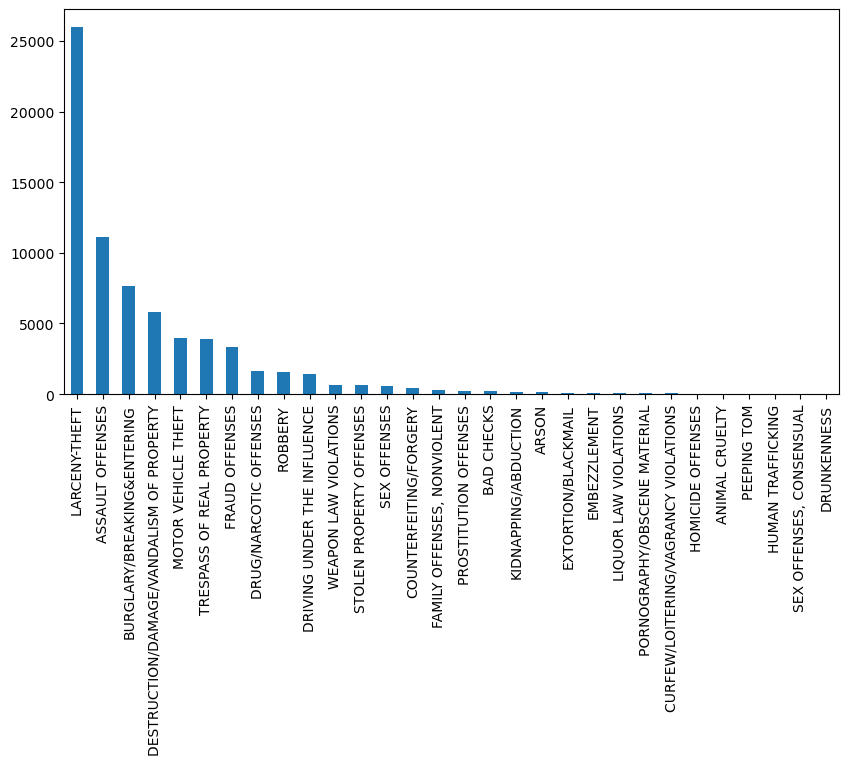

In [259]:
crime_df['Offense Parent Group'].value_counts().plot(kind='bar', figsize=(10,5)) ## figsize=(x,y)

# Part 2: Advanced Functionality

### Convert the `Report DateTime` column to the `datetime64[ns]` dtype and overwrite the column

Verify that it worked by running `crime_df.dtypes`

In [260]:
crime_df['Report DateTime'] = pd.to_datetime(crime_df['Report DateTime'])

In [261]:
crime_df.dtypes

Report Number                     object
Offense ID                         int64
Offense Start DateTime            object
Offense End DateTime              object
Report DateTime           datetime64[ns]
Group A B                         object
Crime Against Category            object
Offense Parent Group              object
Offense                           object
Offense Code                      object
Precinct                          object
Sector                            object
Beat                              object
MCPP                              object
100 Block Address                 object
Longitude                        float64
Latitude                         float64
Person                              bool
OffenseShort                      object
dtype: object

### Create a new column called `report_month` with the month that the crime was reported   
It is fine if the month is represented numerically (i.e. "January" is 1, "February" is 2).

In [262]:
crime_df['report_month'] = crime_df['Report DateTime'].dt.month

In [263]:
crime_df[['Report DateTime', 'report_month']].sample(5)

,Report DateTime,report_month
41640,2019-10-12 20:49:37,10
62034,2019-07-15 02:30:24,7
53533,2019-06-14 21:34:14,6
40294,2019-01-08 09:09:00,1
26790,2019-05-03 04:01:00,5


### What month of 2019 has seen the most crimes reported?  
Solve using two methods:   

#### Method 1: use `.value_counts()`

In [264]:
crime_df['report_month'].value_counts()
## --> 1 --> January

1     6467
8     6268
7     6255
10    5984
9     5857
11    5840
4     5827
3     5781
12    5737
5     5661
6     5613
2     4744
Name: report_month, dtype: int64

#### Method 2: use `.groupby().size()`

In [265]:
crime_df.groupby('report_month').size().sort_values(ascending=False)
## --> 1 --> January

report_month
1     6467
8     6268
7     6255
10    5984
9     5857
11    5840
4     5827
3     5781
12    5737
5     5661
6     5613
2     4744
dtype: int64

### Create a pie chart with the distribution of crimes per month

*Note:* It is better to use a bar plot in most cases. 

<AxesSubplot: ylabel='report_month'>

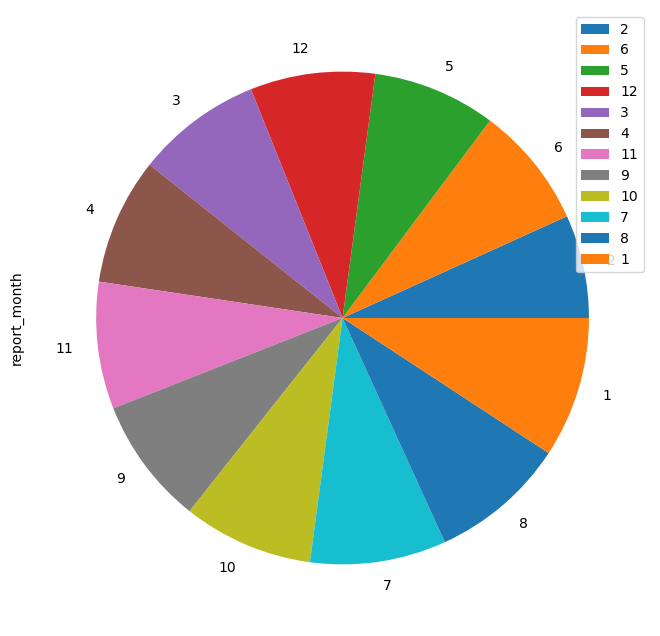

In [266]:
crime_df['report_month'].value_counts().sort_values().plot.pie(figsize=(8, 8), legend=True)

### Create a new dataframe based on the list below and call it `precinct_df`

```python
list_to_use = [{'Precinct' : 'N', 'CustomCode' : 'NPrec'}, 
               {'Precinct' : 'W', 'CustomCode' : 'WPrec'}, 
               {'Precinct' : 'E', 'CustomCode' : 'EPrec'}, 
               {'Precinct' : 'S', 'CustomCode' : 'SPrec'}, 
               {'Precinct' : 'SW', 'CustomCode' : 'SWPrec'}
              ]
```

In [267]:
list_to_use = [{'Precinct' : 'N', 'CustomCode' : 'NPrec'}, 
               {'Precinct' : 'W', 'CustomCode' : 'WPrec'}, 
               {'Precinct' : 'E', 'CustomCode' : 'EPrec'}, 
               {'Precinct' : 'S', 'CustomCode' : 'SPrec'}, 
               {'Precinct' : 'SW', 'CustomCode' : 'SWPrec'}
              ]
precinct_df = pd.DataFrame(list_to_use)

In [268]:
precinct_df.head(2)

,Precinct,CustomCode
0,N,NPrec
1,W,WPrec


### Merge `precinct_df` into `crime_df` based on the `Precinct` column   

In [269]:
crime_df = pd.merge(crime_df, precinct_df, how='left', on='Precinct')

In [270]:
crime_df[['Report Number', 'Precinct', 'CustomCode']]

,Report Number,Precinct,CustomCode
0,2020-043971,N,NPrec
1,2020-042066,N,NPrec
2,2020-901669,W,WPrec
3,2020-901632,SW,SWPrec
4,2020-040844,E,EPrec
...,...,...,...
70029,2020-912750,E,EPrec
70030,2019-384052,W,WPrec
70031,2019-384041,W,WPrec
70032,2019-344453,W,WPrec


# Part 3

The below applies to the `crime_df` and `force_df` datasets. 

### Create (and assign to a new variable) a new dataframe with the total number of `Offense` incidents per `Beat`

**Note:** call the dataframe `crime_by_beat_df`

In [271]:
crime_by_beat_df = crime_df.groupby("Beat").size().reset_index()

### Rename the column with the number of offenses to `numOffense`

In [272]:
crime_by_beat_df = crime_by_beat_df.rename(columns={0 : 'numOffense'})

### Create a new dataframe based on `force_df` with just the force incidents for 2019   
**Note:** call the dataframe `force_df_2019`

In [273]:
force_df['Occured_date_time'] = pd.to_datetime(force_df['Occured_date_time'])

In [274]:
force_df['year'] = force_df['Occured_date_time'].dt.year

In [275]:
force_df_2019 = force_df[force_df['year'] == 2019]

### Add a new column to the `crime_by_beat_df` dataframe with the total number of Police Force incidents for that Police Beat in 2019. 

*Hint 1:* You need to first convert the Police Force dataframe to contain the number of force incidents per row. (think carefully about the aggregator to use!)  

In [276]:
force_by_beat_df = force_df_2019.groupby("Beat").size().reset_index()
force_by_beat_df = force_by_beat_df.rename(columns={0 : 'numForce'})

In [277]:
crime_by_beat_df = pd.merge(crime_by_beat_df, force_by_beat_df, on='Beat', how='left')

### Create a list of Police Beats that did not have any force incidents in 2019

In [278]:
crime_by_beat_df[pd.isna(crime_by_beat_df.numForce)].Beat.values

array(['99', 'OOJ', 'UNKNOWN'], dtype=object)

### Replace any missing values in the `crime_by_beat_df` with the value of 0

In [279]:
crime_by_beat_df = crime_by_beat_df.fillna(0)

### Sort `crime_by_beat_df` from highest to lowest `numForce` and within that highest to lowest `numOffense`

In [280]:
crime_by_beat_df.sort_values(['numForce', 'numOffense'], ascending=False).head(10)

,Beat,numOffense,numForce
23,K2,1873,55.0
24,K3,2450,53.0
8,D2,1507,52.0
30,M3,1633,46.0
42,R2,1491,41.0
40,Q3,1913,36.0
7,D1,1591,36.0
10,E1,1503,35.0
33,N3,1534,34.0
48,U2,1996,33.0


## Create a dataframe that shows the number of offenses for each combination of `Offense Parent Group` (index) and `Beat` (columns)   
Use the `crime_df` dataframe.  

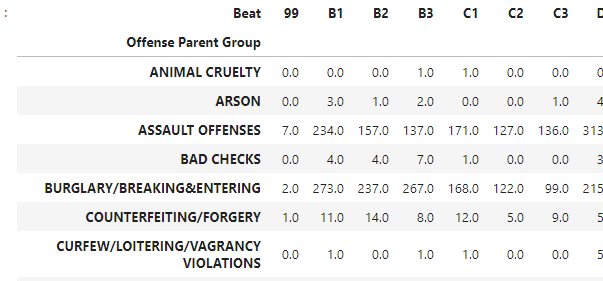

In [281]:
crime_df.groupby(['Offense Parent Group', 'Beat']).size().unstack().fillna(0)

Beat,99,B1,B2,B3,C1,C2,C3,D1,D2,D3,...,S1,S2,S3,U1,U2,U3,UNKNOWN,W1,W2,W3
Offense Parent Group,,,,,,,,,,,,,,,,,,,,,
ANIMAL CRUELTY,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
ARSON,0.0,3.0,1.0,2.0,0.0,0.0,1.0,4.0,3.0,2.0,...,0.0,0.0,1.0,1.0,10.0,6.0,0.0,1.0,0.0,0.0
ASSAULT OFFENSES,7.0,234.0,157.0,137.0,171.0,127.0,136.0,313.0,210.0,237.0,...,175.0,239.0,194.0,237.0,322.0,217.0,18.0,152.0,206.0,145.0
BAD CHECKS,0.0,4.0,4.0,7.0,1.0,0.0,0.0,3.0,6.0,7.0,...,3.0,0.0,3.0,5.0,3.0,4.0,11.0,2.0,4.0,5.0
BURGLARY/BREAKING&ENTERING,2.0,273.0,237.0,267.0,168.0,122.0,99.0,215.0,192.0,218.0,...,89.0,87.0,101.0,363.0,234.0,189.0,1.0,97.0,222.0,138.0
COUNTERFEITING/FORGERY,1.0,11.0,14.0,8.0,12.0,5.0,9.0,5.0,8.0,8.0,...,7.0,2.0,6.0,12.0,5.0,9.0,1.0,6.0,7.0,1.0
CURFEW/LOITERING/VAGRANCY VIOLATIONS,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.0,3.0,1.0,...,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,3.0,138.0,153.0,107.0,105.0,89.0,94.0,146.0,124.0,107.0,...,97.0,100.0,86.0,171.0,189.0,136.0,13.0,104.0,123.0,95.0
DRIVING UNDER THE INFLUENCE,1.0,15.0,34.0,15.0,29.0,28.0,30.0,22.0,24.0,27.0,...,25.0,26.0,26.0,19.0,6.0,17.0,1.0,45.0,48.0,23.0


---
### Use Seaborn and plot the number of crimes per `Sector` and `Crime Against Category`

Use `crime_df`

``` Python
import seaborn as sns
```

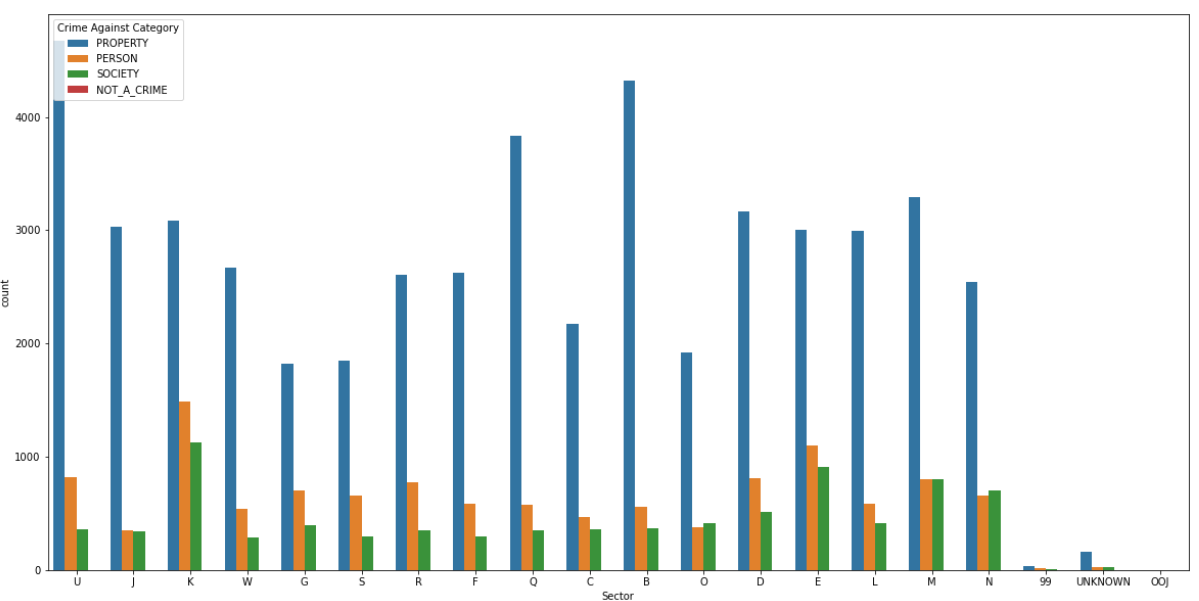

In [282]:
import seaborn as sns

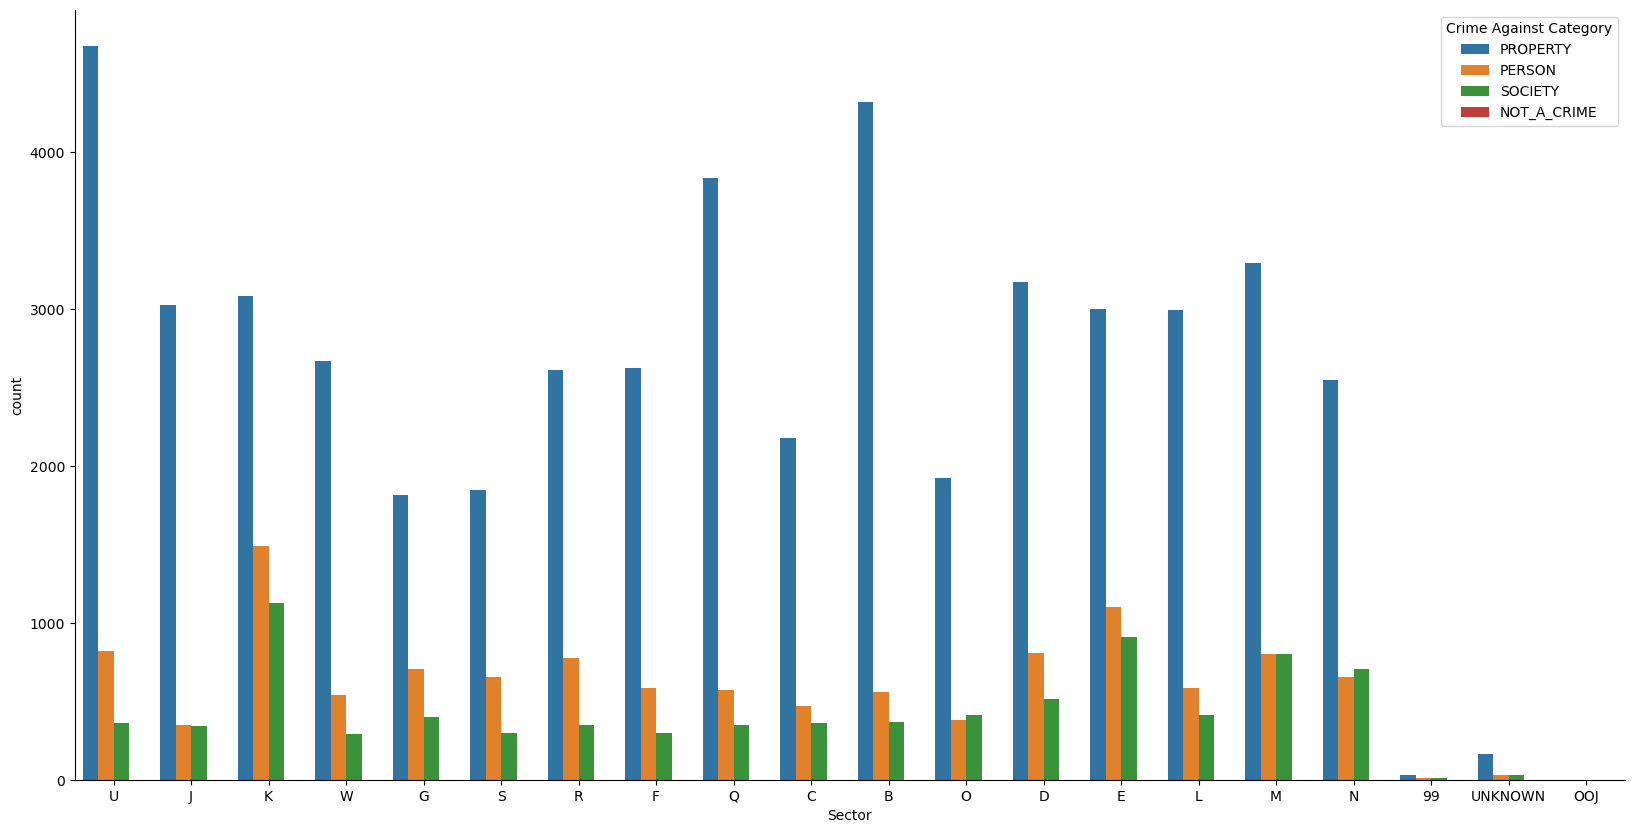

In [283]:
plt.figure(figsize=(20,10))
sns.countplot(x="Sector", hue="Crime Against Category", data=crime_df)
sns.despine()

---
## Challenge 1: use Pandas + Pandas plotting
**Task:** Create a bar chart showing the number of force incidents per month split up by `SubjectGender`  
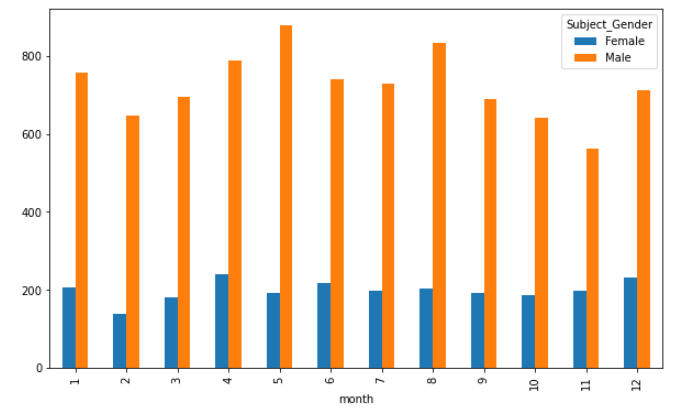

In [285]:
force_df['date'] = pd.to_datetime(force_df.Occured_date_time)
force_df['month']= force_df['date'].dt.month

In [286]:
gender_df = force_df.groupby(['month', 'Subject_Gender']).count()['Incident_Num'].reset_index()

In [287]:
gender_df_pivot = gender_df.pivot(index='month', columns='Subject_Gender', values='Incident_Num').reset_index()

<AxesSubplot: xlabel='month'>

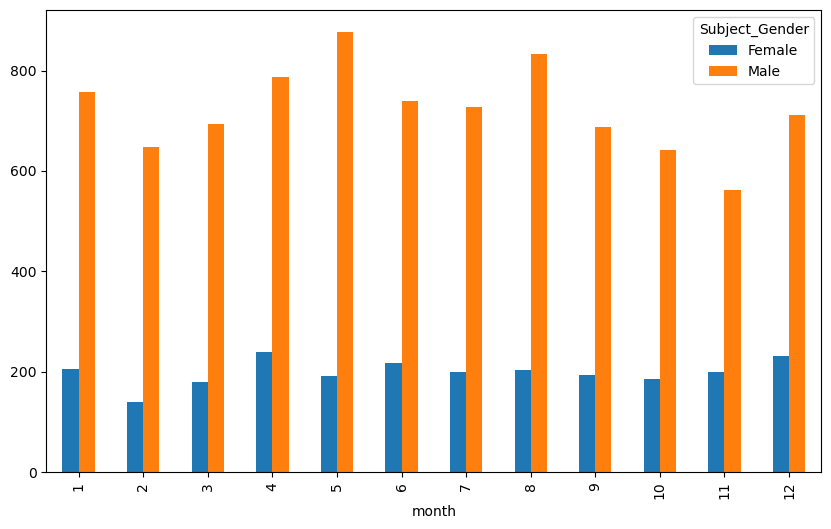

In [288]:
gender_df_pivot.set_index('month')[['Female', 'Male']].plot(kind='bar', figsize=(10,6))

---
### Challenge 2: use `Pandas` +  `Plotnine`  
**Task:** Plot the number of days between `Report DateTime` and `Offense Start DateTime` by `Crime Against Category` with sub-plots by `Sector`.

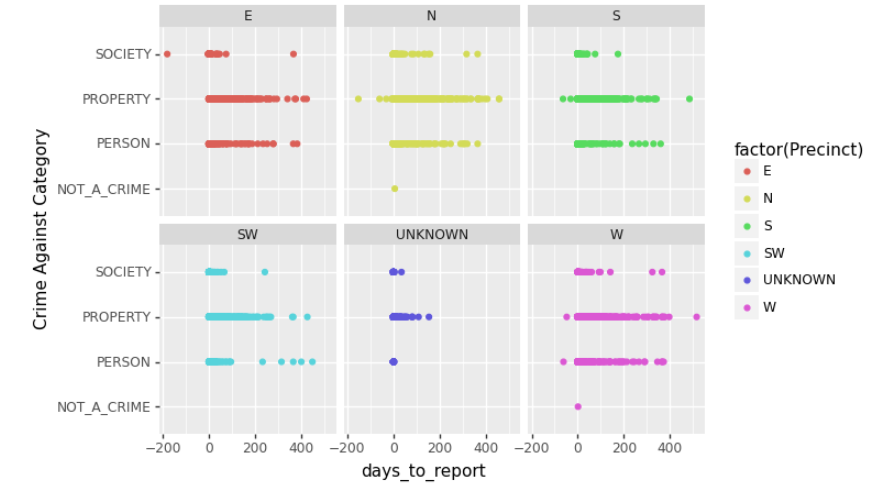

In [289]:
import plotnine
from plotnine import ggplot, geom_bar, geom_boxplot, geom_point, aes

In [290]:
crime_df['days_to_report'] = pd.to_datetime(crime_df['Report DateTime']) - pd.to_datetime(crime_df['Offense Start DateTime'])

In [291]:
crime_df['days_to_report'] = crime_df['days_to_report'].dt.days

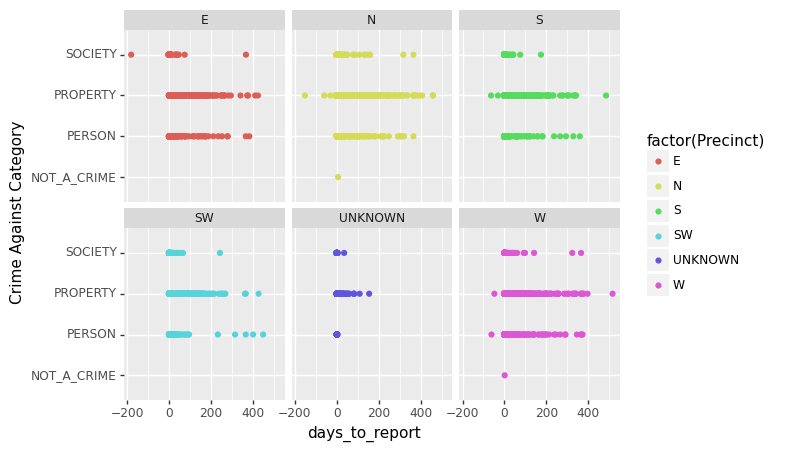

<ggplot: (381762012)>

In [292]:
(
  ggplot(crime_df, aes('days_to_report', 'Crime Against Category', color='factor(Precinct)')) 
  + geom_point()
  + plotnine.facet_wrap('~Precinct')
)